In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import copy
import math

## Part 1: Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

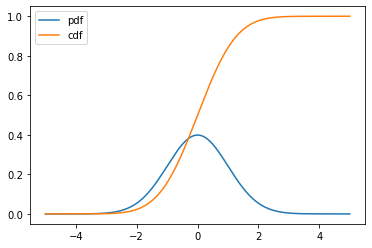

In [3]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

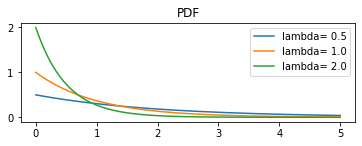

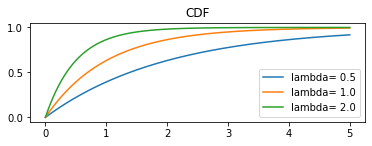

In [4]:
lambdas = [0.5, 1., 2.]

#formatting
ax = plt.subplot(211)


for lambda_ in lambdas:
    #plotting PDF
    xs = np.linspace(0, 5, 5000)
    ys = [lambda_*np.e**(-lambda_*x) for x in xs]
    plt.plot(xs, ys, label="lambda= {}".format(lambda_))
    
plt.title("PDF")
plt.legend()
plt.show()

plt.subplot(212, sharex=ax)

for lambda_ in lambdas:
    #plotting CDF
    ys = [1-np.e**(-lambda_*x) for x in xs]
    plt.plot(xs, ys, label="lambda= {}".format(lambda_))

plt.title("CDF")
plt.legend()
plt.show()

-------------------
## Part 2: Empirical distributions vs. analytic distributions

The question we are trying to answer in this part is: **How well can we model empirical distributions with analytic distributions?**

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

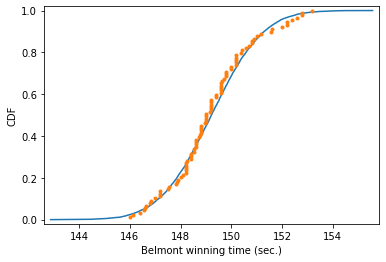

In [5]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

In [6]:
# belmont_no_outliers

best = 144 # Secretariat's time in second
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)
n_samples = 1000000

kde_samples = np.random.normal(mu, sigma, n_samples)

count = 0
for sample in kde_samples:
    if sample <= best:
        count += 1
        
print("Probability of a faster race time than Secretariat: {:.5f}".format(count/n_samples))

Probability of a faster race time than Secretariat: 0.00059


Let's investigate whether the speed of light measurements by Michelson are normally distributed.

In [9]:
speed = pd.read_csv("data/michelson_speed_of_light.csv")
speed = speed['velocity of light in air (km/s)']
speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

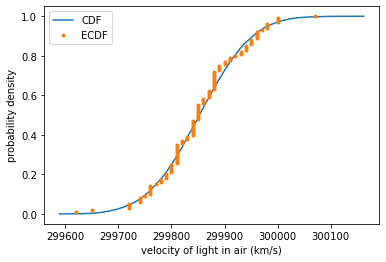

In [10]:
mu = np.mean(speed)
sigma = np.std(speed)
n_samples = 10000

samples = np.random.normal(mu, sigma, n_samples)

x_theor, y_theor = ecdf(samples)
x, y = ecdf(speed)

plt.plot(x_theor, y_theor, label="CDF")
plt.plot(x, y, marker='.', linestyle='none', label="ECDF")
plt.gca().set(xlabel="velocity of light in air (km/s)", ylabel="probability density")
plt.legend()
plt.show()

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution
3. Take 10,000 samples out of an exponential distribution
4. Compute the CDF of the theoretical samples and the ECDF of the sample data
5. Plot the CDF of samples with the ECDF
6. Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale

In [12]:
babies = pd.read_csv("data/babies_brisbane.csv")['time']
babies_rotated = copy.deepcopy(list(babies))

# creating a list rotated by one
babies_rotated.append(babies_rotated.pop(0))

interarrivals = []
for x1, x2 in zip(babies, babies_rotated):
    interarrivals.append(x2 - x1)
    
_ = interarrivals.pop()

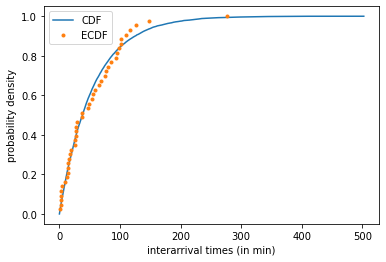

In [13]:
mu = np.mean(interarrivals)
sigma = np.var(interarrivals)
lam = 1/mu
n_samples = 10000

samples = np.random.exponential(scale=1/lam, size=n_samples)

xs_theor, ys_theor = ecdf(samples)
xs, ys = ecdf(interarrivals)

plt.plot(xs_theor, ys_theor, label="CDF")
plt.plot(xs, ys, label="ECDF", marker='.', linestyle='none')
plt.gca().set(xlabel="interarrival times (in min)", ylabel="probability density")
plt.legend()
plt.show()

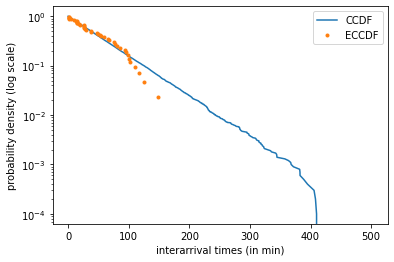

In [14]:
# Get complement, set log scale for plot
ys_theor_c = 1 - ys_theor
ys_c = 1 - ys
plt.yscale("log")

# Plotting
plt.plot(xs_theor, ys_theor_c, label="CCDF")
plt.plot(xs, ys_c, label="ECCDF", marker='.', linestyle='none')
plt.gca().set(xlabel="interarrival times (in min)", ylabel="probability density (log scale)")
plt.legend()
plt.show()

-------------------
## Part 3: Moments and skewness

In [16]:
salaries = pd.read_csv('data/salaries.csv')
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


In [17]:
earn = salaries['earn']
med = np.median(earn)
mu = np.mean(earn)
var = np.var(earn)

# 1st raw moment
r1_moment = lambda x: sum(observation for observation in x) / len(x)

#2nd central movement
c2_moment = lambda x: sum((observation - mu)**2 for observation in x) / len(x)

print("Mean and median salary for the entire samples: {}, {}".format(mu, med))
print("Test if mean is equivalent to 1st raw moment: {}".format(mu == r1_moment(earn)))
print("Test if variance is equivalent to 2nd central moment: {}".format(var == c2_moment(earn)))
print("Skewness: {:.2f}".format(ss.skew(earn)))

Mean and median salary for the entire samples: 23154.773489932886, 20000.0
Test if mean is equivalent to 1st raw moment: True
Test if variance is equivalent to 2nd central moment: False
Skewness: 2.88


Same as above but with sex seperated

In [13]:
sexes = salaries['sex'].unique()

for sex in sexes:
    slice_ = salaries[salaries['sex'] == sex]['earn']
    
    mu = np.mean(slice_)
    var = np.var(slice_)
    
    # 1st raw moment
    print("Test if mean is equivalent to 1st raw moment for {}s: {}".format(sex, mu == r1_moment(slice_)))

    #2nd central movement
    print("Test if variance is equivalent to 2nd central moment for {}s: {}\n".format(sex, var == c2_moment(slice_)))

Test if mean is equivalent to 1st raw moment for males: True
Test if variance is equivalent to 2nd central moment for males: True

Test if mean is equivalent to 1st raw moment for females: True
Test if variance is equivalent to 2nd central moment for females: True

